# Лабораторная работа №1

In [1]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

number = 1
filenames = ['linear1/' + str(number) + '.csv',
             'linear5/' + str(number) + '.csv']

In [2]:
def load_data(filename):
    raw_data = open(filename, 'rt')
    reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
    return np.matrix(list(reader)).astype(float)


def least_squares(X, y):
    return np.linalg.inv(X.T * X) * X.T * y


def make_sets(data, order=1):
    X = np.c_[np.ones(data.shape[0]), data[:, :-1]]
    for i in range(1, order):
        X = np.c_[X, np.square(X[:, -1])]
    y = data[:, -1]

    return train_test_split(X, y, test_size=0.2, random_state=88)


def get_reply(w, X):
    return X * w

Найдем параметры модели для двух датасетов

W = [[1.91009604]
 [3.01037449]]


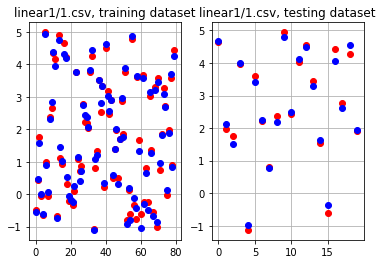

MSE_train = 0.023820871500741976
MSE_test = 0.026821007462707942 

W = [[ 4.73889071]
 [ 1.09186319]
 [-0.4757356 ]
 [ 0.90089091]
 [-0.05502953]
 [ 0.93946054]]


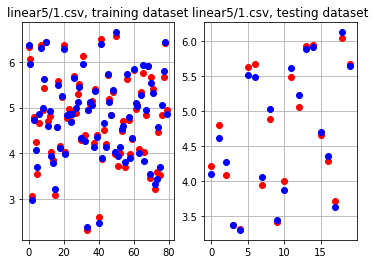

MSE_train = 0.010521885403504613
MSE_test = 0.012238762920960499 



In [3]:
for filename in filenames:
    data = load_data(filename)
    X_train, X_test, y_train, y_test = make_sets(data)
    w = least_squares(X_train, y_train)
    print('W =', w)
    
    _, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(y_train, 'ro')
    ax1.plot(get_reply(w, X_train), 'bo')
    ax1.set_title(filename + ', training dataset')
    ax1.grid()

    ax2.plot(y_test, 'ro')
    ax2.plot(get_reply(w, X_test), 'bo')
    ax2.set_title(filename + ', testing dataset')
    ax2.grid()

    plt.show()

    MSE_train = mean_squared_error(get_reply(w, X_train) , y_train)
    MSE_test = mean_squared_error(get_reply(w, X_test) , y_test)
    print('MSE_train =', MSE_train)
    print('MSE_test =', MSE_test, '\n')
    

Как видим, полученная ошибка на тестовой выборке выше, это ожидаемо.

In [4]:
def get_grad(w, X, y):
    return X.T * X * w - X.T * y


def get_error(w, X, y):
    return 0.5 * sum(map(lambda x: x * x, y - get_reply(w, X)))


def get_regularization_error(w, X, y, lamb):
    return 0.5 * sum(map(lambda x: x * x, y - get_reply(w, X))) + 0.5 * lamb * w.T * w


def gradient_descent(X, y, w0, nu=0.001, eps=0.000001, n_max=5000):
    w = w0
    err = [None] * n_max
    for i in range(0, n_max):
        current_grad = get_grad(w, X, y)
        w = w - nu * current_grad
        
        err[i] = get_error(w, X_train, y_train)

        if i > 0:
            if abs(err[i] - err[i - 1]) < eps:
                break
    return w

Проделаем то же самое для градиентного спуска

W = [[1.90998531]
 [3.00921486]]


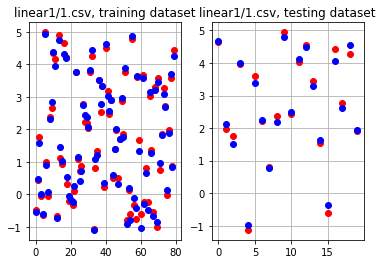

MSE_train = 0.023821320532739144
MSE_test = 0.02689069167319876 

W = [[ 4.73898441]
 [ 1.09055291]
 [-0.47603834]
 [ 0.9009508 ]
 [-0.05401141]
 [ 0.93834423]]


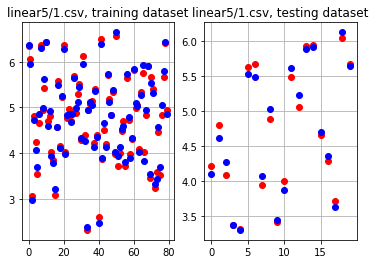

MSE_train = 0.01052267189959907
MSE_test = 0.01235393815938554 



In [5]:
for filename in filenames:
    data = load_data(filename)
    X_train, X_test, y_train, y_test = make_sets(data)
    w0 = np.random.uniform(-1, 1, size=(X_train.shape[1], 1))
    w = gradient_descent(X_train, y_train, w0)
    print('W =', w)

    _, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(y_train, 'ro')
    ax1.plot(get_reply(w, X_train), 'bo')
    ax1.set_title(filename + ', training dataset')
    ax1.grid()

    ax2.plot(y_test, 'ro')
    ax2.plot(get_reply(w, X_test), 'bo')
    ax2.set_title(filename + ', testing dataset')
    ax2.grid()

    plt.show()

    MSE_train = mean_squared_error(get_reply(w, X_train) , y_train)
    MSE_test = mean_squared_error(get_reply(w, X_test) , y_test)
    print('MSE_train =', MSE_train)
    print('MSE_test =', MSE_test, '\n')

Результаты, полученные данными методами, крайне похожи

Попробуем применить тот же метод к нелинейным данным

W = [[-0.39215642]
 [ 1.15541534]]


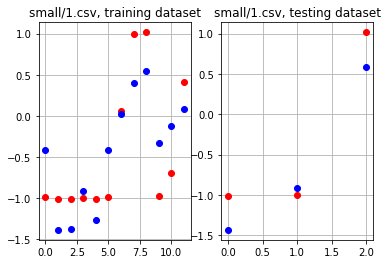

MSE_train = 0.20135670778769557
MSE_test = 0.12295668464986716 



In [6]:
filename = 'small/' + str(number) + '.csv'
data = load_data(filename)
X_train, X_test, y_train, y_test = make_sets(data)
w0 = np.random.uniform(-1, 1, size=(X_train.shape[1], 1))
w = gradient_descent(X_train, y_train, w0)
print('W =', w)

_, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(y_train, 'ro')
ax1.plot(get_reply(w, X_train), 'bo')
ax1.set_title(filename + ', training dataset')
ax1.grid()

ax2.plot(y_test, 'ro')
ax2.plot(get_reply(w, X_test), 'bo')
ax2.set_title(filename + ', testing dataset')
ax2.grid()

plt.show()

MSE_train = mean_squared_error(get_reply(w, X_train) , y_train)
MSE_test = mean_squared_error(get_reply(w, X_test) , y_test)
print('MSE_train =', MSE_train)
print('MSE_test =', MSE_test, '\n')

Как видим, ошибки довольно сильно возрасли.

Исследуем полиномиальные модели.

Min MSE = 0.05419862426545453 and p = 5
MSE(p=1) - Min MSE = 0.06875788868724722


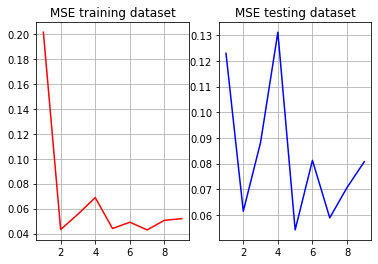

In [83]:
filename = 'small/' + str(number) + '.csv'
data = load_data(filename)
MSE_trains = list()
MSE_tests = list()

for i in range(1, 10):  
    X_train, X_test, y_train, y_test = make_sets(data, i)
    w0 = np.random.uniform(-1, 1, size=(X_train.shape[1], 1))
    w = gradient_descent(X_train, y_train, w0)
    MSE_trains.append(mean_squared_error(get_reply(w, X_train) , y_train))
    MSE_tests.append(mean_squared_error(get_reply(w, X_test) , y_test))

_, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(range(1, len(MSE_trains) + 1), MSE_trains, 'r')
ax1.set_title('MSE training dataset')
ax1.grid()

ax2.plot(range(1, len(MSE_tests) + 1), MSE_tests, 'b')
ax2.set_title('MSE testing dataset')
ax2.grid()

print('Min MSE =', min(MSE_tests), 
      'and p =', MSE_tests.index(min(MSE_tests)) + 1)
print('MSE(p=1) - Min MSE =', MSE_tests[0] - min(MSE_tests))

Как видим, наилучший результат достигается при p = 5

Отобразим результат для этого p.

W = [[-0.82542949]
 [ 1.4066135 ]
 [ 1.43429524]
 [ 0.17972514]
 [-0.49704732]
 [ 0.23477151]
 [-0.32850513]]


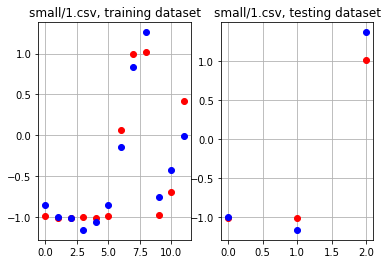

MSE_train = 0.04155319367928193
MSE_test = 0.0508601792667173 



In [85]:
filename = 'small/' + str(number) + '.csv'
data = load_data(filename)
X_train, X_test, y_train, y_test = make_sets(data, 6)
w0 = np.random.uniform(-1, 1, size=(X_train.shape[1], 1))
w = gradient_descent(X_train, y_train, w0)
print('W =', w)

_, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(y_train, 'ro')
ax1.plot(get_reply(w, X_train), 'bo')
ax1.set_title(filename + ', training dataset')
ax1.grid()

ax2.plot(y_test, 'ro')
ax2.plot(get_reply(w, X_test), 'bo')
ax2.set_title(filename + ', testing dataset')
ax2.grid()

plt.show()

MSE_train = mean_squared_error(get_reply(w, X_train) , y_train)
MSE_test = mean_squared_error(get_reply(w, X_test) , y_test)
print('MSE_train =', MSE_train)
print('MSE_test =', MSE_test, '\n')

In [9]:
def gradient_descent_reg(X, y, w0, lamb, nu=0.001, eps=0.000001, n_max=5000):
    w = w0
    err = [None] * n_max
    for i in range(0, n_max):
        current_grad = get_grad(w, X, y)
        w = w - nu * current_grad
        
        err[i] = get_regularization_error(w, X_train, y_train, lamb)

        if i > 0:
            if abs(err[i] - err[i - 1]) < eps:
                break
    return w

Запустим для некоторых значений параметра регуляризации и p

In [75]:
filename = 'small/' + str(number) + '.csv'
data = load_data(filename)


lambs = range(1, 4)
ps = range(1, 10)
MSE_tests = np.zeros(shape=(len(lambs)+1,len(ps)+1))

for lamb in lambs:
    for p in ps:
        X_train, X_test, y_train, y_test = make_sets(data, p)
        w0 = np.random.uniform(-1, 1, size=(X_train.shape[1], 1))
        w = gradient_descent_reg(X_train, y_train, w0, lamb)      
        MSE_tests[lamb, p] = mean_squared_error(get_reply(w, X_test) , y_test)

In [76]:
import pandas as pd
pd.options.display.float_format = '|{:,.3f}'.format
tbl = pd.DataFrame(MSE_tests)
print(tbl)
print(np.min(MSE_tests[1:,1:]))

       0      1      2      3      4      5      6      7      8      9
0 |0.000 |0.000 |0.000 |0.000 |0.000 |0.000 |0.000 |0.000 |0.000 |0.000
1 |0.000 |0.164 |0.033 |0.045 |0.012 |0.030 |0.019 |0.034 |0.023 |0.036
2 |0.000 |0.123 |0.058 |0.045 |0.066 |0.117 |0.059 |0.047 |0.058 |0.115
3 |0.000 |0.123 |0.064 |0.060 |0.048 |0.049 |0.092 |0.073 |0.059 |0.086
0.012357334924161772


Как видим, минимум достигается для полинома c p = 4 и параметром регуляризации 1, что говорит о том, что нам удалось снизить эффект переобучения. Кроме того, полученный результат гораздо лучше, чем результат модели без регуляризации.